In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf

### Declaring constants

In [2]:
y_size = 10000
year = 10
r = np.random.randint(200, size=4)/100 + 3
p = np.random.randint(180, size=4)
t = np.linspace(0, year, y_size)
cutoff_power = 5000

f1 = 1
f2 = 3
f3 = 5

v_comp1 = r[0] * np.sin(2*np.pi*f1*t + p[0])
v_comp2 = r[1] * np.sin(2*np.pi*f2*t + p[1])
v_comp3 = r[2] * np.sin(2*np.pi*f3*t + p[2])
v_accel = 0.01*t

v_comp = v_comp1 + v_comp2 + v_comp3 + v_accel

### V_comp generation

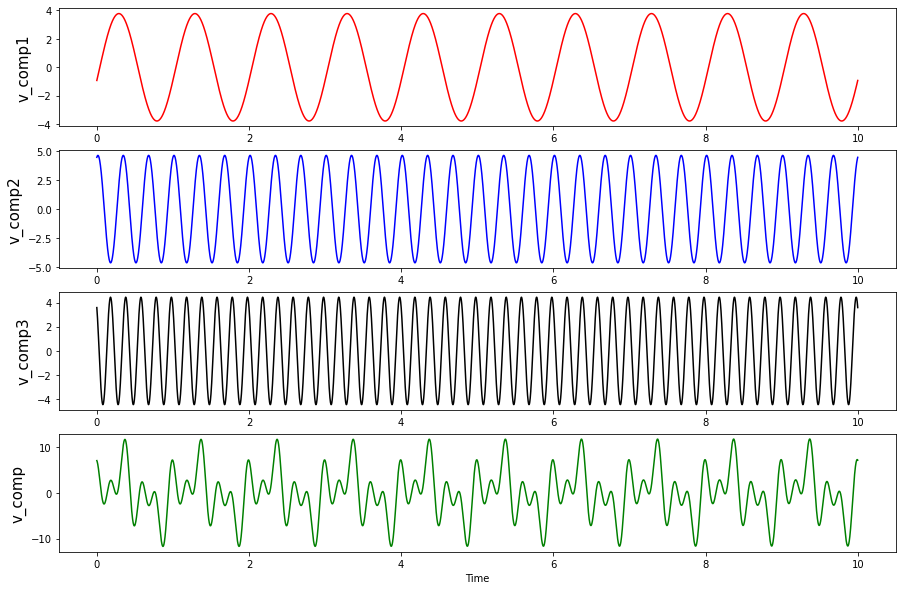

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(4, 1, 1)
plt.plot(t, v_comp1, 'r')
plt.ylabel("v_comp1",size=15)
plt.subplot(4, 1, 2)
plt.plot(t, v_comp2, 'b')
plt.ylabel("v_comp2",size=15)
plt.subplot(4, 1, 3)
plt.plot(t, v_comp3, 'k')
plt.ylabel("v_comp3",size=15)
plt.subplot(4, 1, 4)
plt.plot(t, v_comp, 'g')
plt.ylabel("v_comp",size=15)
plt.xlabel("Time")
plt.show()

### Adding random noise

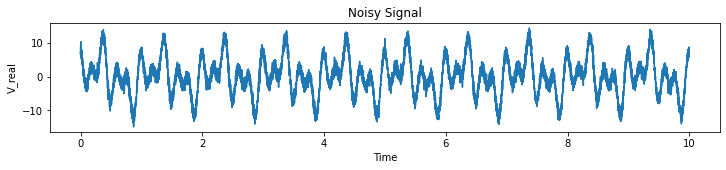

In [9]:
v_real = v_comp + np.random.randn(y_size)

plt.figure(figsize=(12,2))
plt.plot(t, v_real)
plt.title('Noisy Signal')
plt.ylabel('V_real')
plt.xlabel('Time')
plt.show()

### Fourier Transform
To find the frequency values, f1, f2 and f3

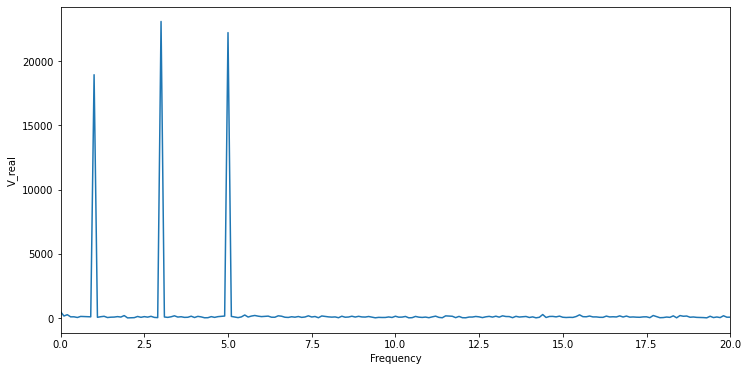

In [36]:
power = np.fft.rfft(v_real)
freq = np.fft.rfftfreq(len(v_real), 0.001)

plt.figure(figsize=(12,6))
plt.plot(freq, np.abs(power))
plt.ylabel("V_real")
plt.xlabel("Frequency")
plt.xlim([0,20])
plt.show()

### Denoising output FT

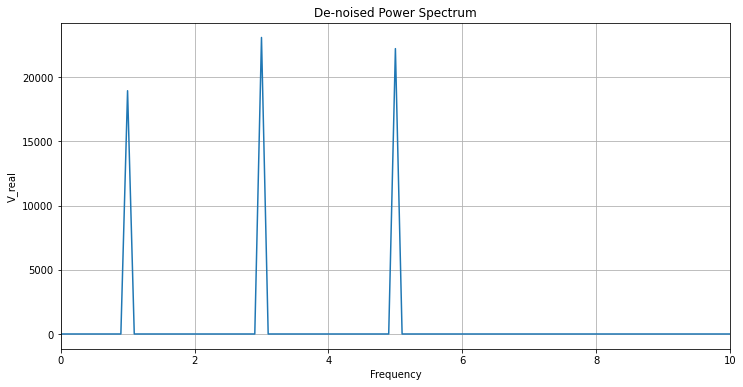

In [35]:
indices=np.where(np.abs(power)<cutoff_power)
power[indices]=0
plt.figure(figsize=(12,6))
plt.plot(freq, np.abs(power))
plt.title("De-noised Power Spectrum")
plt.ylabel("V_real")
plt.xlabel("Frequency")
plt.xlim([0,10])
plt.grid()
plt.show()

### Inverse FT
To extract de-noised V_comp from V_real

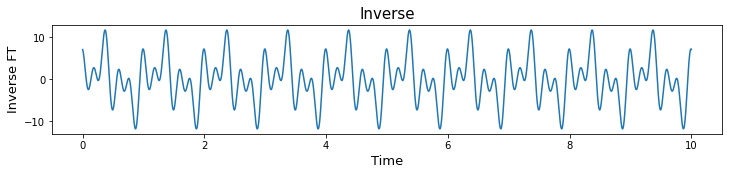

In [19]:
inverse=np.fft.irfft(power) #Notice the i in irfft

plt.figure(figsize=(12,2))
plt.plot(t, inverse)
plt.title("Inverse", size=15)
plt.xlabel("Time", size=13)
plt.ylabel("Inverse FT", size=13)
plt.show()

### Recovering acc due to dark matter

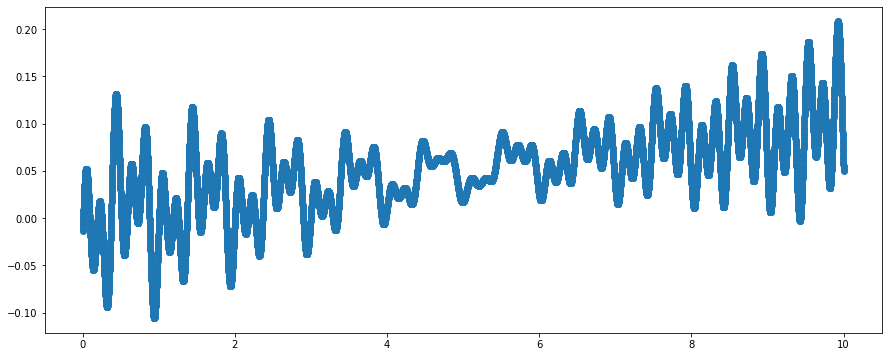

In [31]:
sth = v_comp - inverse
plt.figure(figsize=(15,6))
plt.scatter(t, sth)
plt.show()

### Linear fit

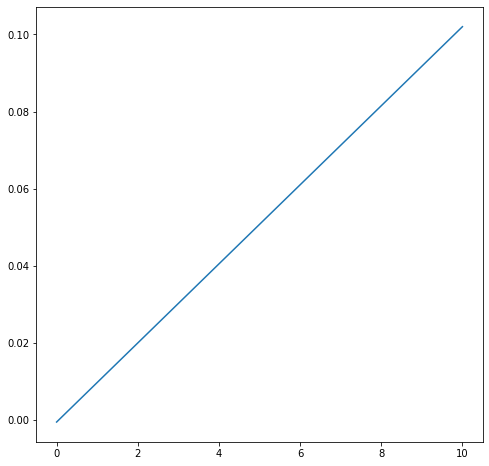

In [39]:
def eqn (t, m, c):
    return m*t+c
    

po, pc = cf(eqn, t, sth)
plt.figure(figsize=(8,8))
plt.plot(t, eqn(t, *po))
plt.show()